<a href="https://colab.research.google.com/github/muskanalirizvi/Algorithm-Performance-Benchmarking/blob/main/Maternal_Health_Risk_Data_Set_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd

df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df[columns] = scaler.fit_transform(df[columns])

In [172]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['RiskLevel'], axis = 1), df['RiskLevel'], test_size = 0.2)

In [173]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 20)

In [174]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [175]:
y_pred = model.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8719211822660099

In [177]:
matrix = confusion_matrix(y_test,y_pred)

In [178]:
import seaborn as sns

<Axes: >

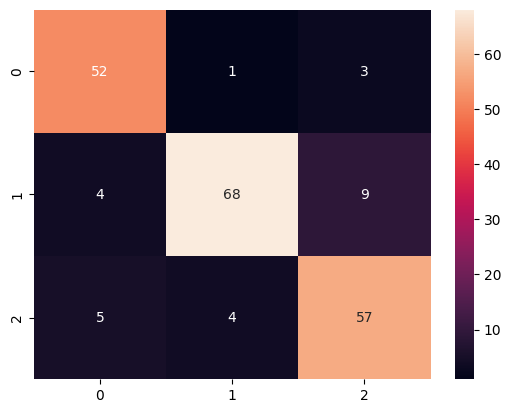

In [179]:
sns.heatmap(matrix,annot=True)